---
# Zadaća 4
##### Rok za predaju: 24. ožujka, 2021. u 23:59h
##### Način predaje: Teams->Strojno učenje->Assignment, predajete.ipynb datoteka (ili više datoteki u .zip) ili link na Google colab 

### Ime i prezime: Luka Strapač

---

In [69]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import scale
from sklearn.metrics import confusion_matrix, accuracy_score, recall_score, precision_score
from random import randrange
# ...

---
---
## Zadatak 1 (10)

Pokažite ekvivalenciju kriterijskih funkcija $J_1(\theta)=\frac{1}{m}\sum\limits_{i=1}^{m}\log(1+e^{-y^{(i)}\theta^Tx^{(i)}}), \; gdje\; je \; y^{(i)}\in\{-1,1\}$ i 
$$J_2(\theta) = -\frac{1}{m}\sum\limits_{i=1}^{m}(y^{(i)}\log{(h_{\theta}(x^{(i)})+(1-y^{(i)})\log{(1-h_{\theta}(x^{(i)}))})}, \; gdje\; je\; y^{(i)}\in \{0,1\}.$$



# Vas odgovor ovdje

$$
J_2(\theta) = -\frac{1}{m}\sum\limits_{i=1}^{m}(\log{((h_{\theta}(x^{(i)}))^{y^{(i)}})+\log{(h_{\theta}(-x^{(i)}))^{(1-y^{(i)})}})}\\
= -\frac{1}{m}\sum\limits_{i=1}^{m}\log{(h_{\theta}(x^{(i)})^{y^{(i)}}\cdot\frac{h_{\theta}(-x^{(i)})}{h_{\theta}(-x^{(i)})^{y^{(i)}}}})\\
= -\frac{1}{m}\sum\limits_{i=1}^{m}\log{(\frac{1}{1+e^{\theta^Tx^{(i)}}}\cdot(\frac{1+e^{\theta^Tx^{(i)}}}{1+e^{-\theta^Tx^{(i)}}})^{y^{(i)}})}\\
= -\frac{1}{m}\sum\limits_{i=1}^{m}\log{(\frac{1}{1+e^{\theta^Tx^{(i)}}}\cdot e^{y^{(i)}\theta^Tx^{(i)}})}\\
= -\frac{1}{m}\sum\limits_{i=1}^{m}\log{(\frac{1}{e^{-y^{(i)}\theta^Tx^{(i)}}+e^{(1-y^{(i)})\theta^Tx^{(i)}}})}\\
= -\frac{1}{m}\sum\limits_{i=1}^{m}\log{(e^{-y^{(i)}\theta^Tx^{(i)}}+e^{(1-y^{(i)})\theta^Tx^{(i)}})}, \quad  y^{(i)} \in {0,1}\\
J1 = J2 \\
y_1^{(i)} = -1 \quad y_2^{(i)} = 0\\
\frac{1}{m}\sum\limits_{i=1}^{m}(1+e^{\theta^Tx^{(i)}}) = \frac{1}{m}\sum\limits_{i=1}^{m}(1+e^{\theta^Tx^{(i)}})\\
y_1^{(i)} = 1 \quad y_2^{(i)} = 1\\
\frac{1}{m}\sum\limits_{i=1}^{m}(1+e^{-\theta^Tx^{(i)}}) = \frac{1}{m}\sum\limits_{i=1}^{m}(e^{-\theta^Tx^{(i)}}+1)\\
\Rightarrow funkcije \quad su \quad ekvivalentne
$$

---
---
## Zadatak 2 (20)

Neka su zadani podaci $X\in \mathbb{R}^{m\times n}$ i pripadne izlazne vrijednosti $y \in \mathbb{R}^{m\times k}$ koje označavaju pripadnost nekog podatka jednoj od klasa $0, 1, \cdots, k$. Na ovim podacima možemo provesti proces učenja klasifikacijskog modela. Jedan od takvh modela je logistička regresija. <br>
Logistička regresija kao model funkciju koristi $h_{\theta}(x) = \frac{1}{1+e^{-\theta ^T x}}$, gdje su $\theta$ parametri koje model uči. <br>
Znamo kako se učenje svodi na minimizaciju funkcije $J(\theta) = \frac{1}{m}\sum\limits_{i=1}^m [-y^{(i)}\log{(h_{\theta}(x^{(i)}))} - (1-y^{(i)})\log{(1-h_{\theta}(x^{(i)}))}]$ te kako do rješenje tog minimizacijskog problema možemo doći gradijentnom metodom.


1. Implementirajte gradijentnu metodu za slučaj binarne klasifikacije ($k=2$). Neka vaša funkcija koja pokreće gradijentnu metodu kao argumente prima stopu učenja $\alpha$ i broj iteracija metode.
2. Isprobajte vašu implementaciju na danom skupu podataka ..

---
U datoteci *heart_data.csv* nalaze se podaci o pacijentima vezani uz zdravlje njihovog krvožilnog sustava i srca. Svakom pacijentu su navedene godine, spol i podaci koji dolaze iz mjerenja poput razine kolesterola, maksimalni otkucaj srca i slično. Osim toga svakom je pacijentu pridružena oznaka $0$ ako ne boluje od srčanih bolesti tj. zdrav je i $1$ ako ima srčanu bolest. <br>
- Istražite i pripremite ih za učenje modela. (Učitajte, skalirajte, vizualizirajte ) 
- Postavite model logističke regresije koristeći implementaciju iz prethodnog zadatka. 
- Model je potrebno učiti na $70\%$ podataka, a zatim ga testirati na preostalih $30\%$ podataka. 
- Kako biste ocijenili model koristite metrike koje smo upoznali na vježbama.


In [108]:
# 2.2.
test_x = np.array([[-30,8],[3,-37],[-17,18],[-22, 9],[-1,-25],[21,3],[8,-10],[0,-12],[-0,-18],[-2,15],[-3,-23],[3,-16],[27,-24],[-16,15],[-13,-13],[-3,6],[23,10],[ 12,17],[3,4],[-8,22]])
text_y = np.array([0, 1, 0, 0, 1, 1, 1, 1, 1, 0, 0, 1, 1, 0, 1, 0, 1, 0, 0, 0])

np.seterr(divide = 'ignore') 

def g(z):
    return (1.0/(1.0 + np.exp(-z)))

def lossf(X,y,theta):
    return -(1/X.shape[0])*np.sum(y*np.log(1/g(X.dot(theta))) + (1-y)*np.log(1-g(X.dot(theta))))

def gradientMethod(X, y, num_iters):
    m, n = X.shape
    alpha = 1
    theta = np.zeros((n,1))
    for k in range(num_iters):
        i = np.random.randint(m)
        if y[i]*(theta.T.dot(X[i])) <= 1:
            theta = theta + alpha*y[i]*X[i].reshape(-1,1)
        alpha = 1/(k+1)
    return theta

print(gradientMethod(test_x, text_y, 1000))



[[ 7.43491303]
 [-5.2014506 ]]


In [109]:
# Vas kod
data = pd.read_csv("heart_data.csv")
data = data.dropna()

X = np.array(data[['Age', 'Sex', 'Chest_Pain', 'Resting_Blood_Pressure','Colestrol', 'Fasting_Blood_Sugar', 'Rest_ECG', 'MAX_Heart_Rate', 
                 'Exercised_Induced_Angina', 'ST_Depression','Slope','Major_Vessels', 'Thalessemia']])
y = np.array(data[['Target']])

X = scale(X)


X_train, X_test, Y_train, Y_test = train_test_split(X, y, test_size=0.3)
log = LogisticRegression()
log.fit(X_train,Y_train.ravel())
log.score(X_train,Y_train.ravel())

theta = gradientMethod(X_train, Y_train, 1000)
y_pred = log.predict(X_test)
tn, fp, fn, tp = confusion_matrix(Y_test, y_pred).ravel()
spec_score = tn/(tn+fp)
print(accuracy_score(Y_test,y_pred))
print(recall_score(Y_test, y_pred))
print(spec_score)
print(precision_score(Y_test,y_pred))


0.8666666666666667
0.7777777777777778
0.9259259259259259
0.875


---
---
## Zadatak 3 (10)
Na predavanju je predstavljena softmax regresija i dana je kriterijska funkcija $$
J(\theta) = - \sum\limits_{i=1}^{m} \sum\limits_{j=1}^{k} I^{j}(y^{(i)})\log{\frac{e^{\theta^{(j)^T}x^{(i)}}}{\sum\limits_{l=1}^{k}e^{\theta^{(l)^{T}}x^{(i)}}}}
$$
Raspišite gradijent funkcije $J(\theta)$. 
---

Vaš odgovor:

$
\nabla_{\theta} J =
\begin{bmatrix}
\vdots & \vdots & \cdots & \vdots\\
\nabla_{\theta^{(1)}}J(\theta) & \nabla_{\theta^{(2)}}J(\theta) & \cdots & \nabla_{\theta^{(k)}}J(\theta)\\
\vdots & \vdots & \cdots & \vdots\\
\end{bmatrix}\\
\nabla_{\theta^{(r)}} J =
\begin{bmatrix}
\frac {\partial J(\theta)}{\partial \theta_{1r}}\\
\frac {\partial J(\theta)}{\partial \theta_{2r}}\\
\vdots \\
\frac {\partial J(\theta)}{\partial \theta_{mr}}\\
\end{bmatrix} \\
\nabla_{\theta^{(r)}} J(\theta) = -\sum\limits_{i=1}^{m}\sum\limits_{j=1}^{k}I^j(y^{(i)})(log{\frac{e^{\theta^{(j)^T}x^{(i)}}}{\sum\limits_{l=1}^{k} e^{\theta^{(l)^T}x^{(i)}}}})'\\
= -\sum\limits_{i=1}^{m}\sum\limits_{j=1}^{k}I^j(y^{(i)}){\frac{\sum\limits_{l=1}^{k} e^{\theta^{(l)^T}x^{(i)}}}{e^{\theta^{(j)^T}x^{(i)}}}}\cdot \frac{(\theta^{(j)}x^{(i)})e^{\theta^{(l)^T}x^{(i)}}\cdot\sum\limits_{l=1}^{k} e^{\theta^{(l)^T}x^{(i)}}-e^{\theta^{(l)^T}x^{(i)}}\cdot x^{(i)}e^{\theta^{(r)^T}}x^{(i)}}{(\sum\limits_{l=1}^{k} e^{\theta^{(l)^T}x^{(i)}})^2}\\
=-\sum\limits_{i=1}^{m}\sum\limits_{j=1}^{k}I^j(y^{(i)})\cdot x^{(i)} \cdot (I^r(j)-\frac{e^{\theta^{(r)^T}x^{(i)}}}{\sum\limits_{l=1}^{k} e^{\theta^{(l)^T}x^{(i)}}})\\
= -\sum\limits_{i=1}^{m}x^{(i)}\sum\limits_{j=1}^{k}I^j(y^{(i)})\cdot 
(I^r(j) - P(y^{(i)}=r|x^{(i)},\theta))\\
=-\sum\limits_{i=1}^{m}x^{(i)}\cdot (I^r(y^{(i)})-P(y^{(i)}=r|x^{(i)}, \theta)) $

---
---
## Zadatak 4 (20)


#### a)
Neka su zadani podaci $X\in \mathbb{R}^{m\times n}$ i pripadne izlazne vrijednosti $y\in \mathbb{R}^{m\times k}$ koje označavaju pripadnost nekog podatka jednoj od klasa $0, 1, \cdots, k$. Na ovim podacima možemo provesti proces učenja klasifikacijskog modela.<br>
Budući da se radi o višeklasnoj klasifikaciji, koristit ćemo *softmax* funkciju.<br> 
Kao i do sada, učenje se svodi na minimizaciju funkcije 
$$
J(\theta) = - \sum\limits_{i=1}^{m} \sum\limits_{j=1}^{k} I^{j}(y^{(i)})\log{\frac{e^{\theta^{(j)^T}x^{(i)}}}{\sum\limits_{l=1}^{k}e^{\theta^{(l)^{T}}x^{(i)}}}}
$$
te kako do rješenja tog minimizacijskog problema možemo doći gradijentnom metodom. <br>

1. Implementirajte gradijentnu metodu za općeniti slučaj klasifikacije. Neka vaša funkcija koja pokreće gradijentnu metodu kao argumente prima stopu učenja $\alpha$ i broj iteracija metode.
2. Isprobajte implementiranu funkciju na podacima $data\_examples.csv$. Odaberite proizvoljno stopu učenja $\alpha$ i broj iteracija. 
3. Nacrtajte graf promjene vrijednosti funkcije troška kroz iteracije i ispišite vrijednost funkcije troška u zadnjoj iteraciji. 

---
#### b)
Zadani su vam podaci koji se nalaze u direktoriju *Mobiteli* <br>

Ovaj skup sadrži podatke o mobitelima - njihove karakteristike i cjenovne rangove. Svaki uzorak (mobitel) je opisan kroz $20$ različitih varijabli. Varijable su kategoričke poput $dual\_sim$ koja poprima vrijednosti $0$ i $1$ ili numeričke poput $clock\_speed$. $18$ varijabli je tipa **int**,a $2$ su tipa **float**. <br>

Svaki mobitel je klasificiran u jedan cjenovni razred koji može biti $1$, $2$ ili $3$. <br>


Potrebno je upoznati se sa skupom podataka, analizirati ga koristeći neke kvantitativne ili grafičke tehnike.<br> 
Glavni zadatak je vidjeti može li se na temelju različitih karakteristika mobitel odrediti njegov cjenovni razred. <br>


Koristeći *softmax* implementaciju iz a) podzadatka riješite ovaj problem tako da ćete 
1. Podatke istražiti i pripremiti ih za učenje modela. (Učitajte, skalirajte, vizualizirajte ) 
1. Model učiti na train.csv
2. Model testirati na test.csv i ispisati matricu zabune, točnost (accuracy)

In [106]:
# Vaš kod
#a)

def h(theta,x):
    k = np.array(x.dot(theta),dtype=np.float64)
    br = np.exp(k)
    naz = np.nansum(br)
    return br/naz


def softMax(X,y,alpha,num_iter):
    k = np.max(y) + 1
    k = int(k)
    m = X.shape[0]
    n = X.shape[1]
    lossfs = []
    theta = np.zeros((n,k))
    for i in range(num_iter):
        j = randrange(0,m)
        
        a = np.zeros((1,k))
        a[0,int(y[j])] = 1
        
        theta= theta+alpha*(np.reshape(X[j],(n,1)).dot(a-h(theta,X[j])))
        lossfs.append(lossf(X,y,theta))
    return theta, lossfs

data = pd.read_csv("data_examples_2.csv")
X = np.array(data[['x1', 'x2']])
X = scale(X)
y = np.array(data['y']).reshape(-1,1)

y = scale(y)

a, b = softMax(X,y,0.1, 1000)
print(a)
print(b[-1])

[[-2.14816633  2.14816633]
 [-1.90159901  1.90159901]]
3.6240231078511806


Text(0, 0.5, 'Trošak')

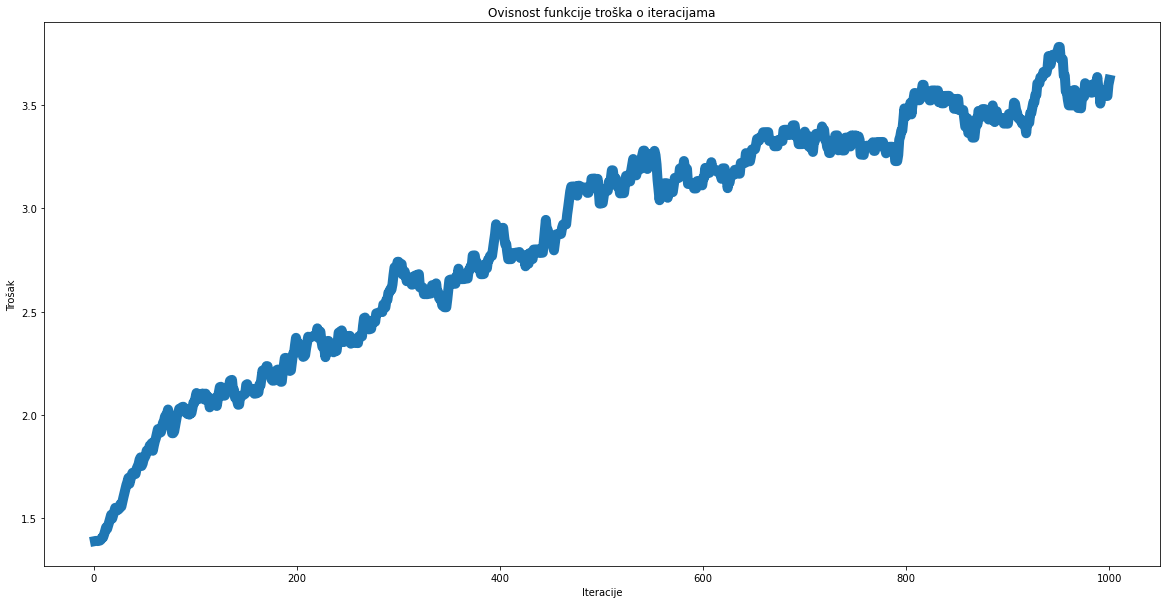

In [107]:
plt.figure(figsize=(20,10))
plt.plot(np.arange(1, len(b)+1),b, linewidth = 10)
plt.title("Ovisnost funkcije troška o iteracijama")
plt.xlabel("Iteracije")
plt.ylabel("Trošak")